# Airbnb Seattle Project

Airbnb is a popular online platform that enables homeowners and apartment owners to offer their properties for short-term stays to travelers. Its user-friendly interface and flexible options have made it a preferred choice among tourists.

<b>My goal in this project is to analyze the Airbnb Seattle dataset and address three key business questions:</b>

>- What are the review score ratings based on property type  ? 
>- Which neighbourhoods have the highest average listings prices per night?
>- Who are the top hosts in terms of total listings count ? What types of listings they own?

<b>Features needed to answer the 3 stated questions:</b>
>- id
>- name
>- host_id 
>- calculated_host_listings_count  
>- neighbourhood_group_cleansed
>- neighbourhood_cleansed
>- property_type 
>- price: daily price in local currency
>- review_scores_rating: rating of the Overall experience.

<b>A detailed description of the features is provided <a href="https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596"> HERE </a></b>

<b>Types of star ratings in Airbnb: </b>
> Reference https://www.airbnb.com/help/article/1257
>- Overall experience. How was it?
>- Cleanliness. Did the place meet our standards?
>- Accuracy. Was it accurately represented with up-to-date photos and info?
>- Check-in. Should be easy.
>- Communication. Did the Host respond to messages promptly?
>- Location. Was the guest made aware of safety, transportation, points of interest and special considerations like noise or other situations that might affect their stay?
>- Value. Was it worth the price?
>- Amenities. Was everything promised in the listing available and in good, working condition?

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
for col in df.columns:
    print("#####",col,":")
    print(df[col].unique())
    print(len(df[col].unique()))

##### id :
[  241032   953595  3308979 ... 10267360  9604740 10208623]
3818
##### listing_url :
['https://www.airbnb.com/rooms/241032'
 'https://www.airbnb.com/rooms/953595'
 'https://www.airbnb.com/rooms/3308979' ...
 'https://www.airbnb.com/rooms/10267360'
 'https://www.airbnb.com/rooms/9604740'
 'https://www.airbnb.com/rooms/10208623']
3818
##### scrape_id :
[20160104002432]
1
##### last_scraped :
['2016-01-04']
1
##### name :
['Stylish Queen Anne Apartment' 'Bright & Airy Queen Anne Apartment'
 'New Modern House-Amazing water view' ...
 'Private apartment view of Lake WA' 'Amazing View with Modern Comfort!'
 'Large Lakefront Apartment']
3792
##### summary :
[nan
 "Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria.  No smoking, no pets.  Designed for healthy living, so breathe easy."
 'New modern house built in 2013.  Spectacular sunset/water views and li

### Insights:

- From the Non-Null Count, we can see that we will be dealing with a lot of missing data and some columns such as "license" and "square_feet".


- Numerical columns (e.g. "security_deposit", "cleaning_fee", and "monthly_price" ) have Dtype=object, because they contain the values as string with the currency (e.g. "$125.00") 



- Boolean columns (e.g. "require_guest_profile_picture") have Dtype=objectm because they contain the values as string of ("t" and "f")



- Some features are not very informative as they have only one unique value, such as "scrape_id", "last_scraped", and "experiences_offered". Also, feature "state" containes two unique values that are identical "WA" and "wa", so it needs pre-processing Capitalization.


- The unique values in certain columns (e.g., "host_location") are not informative enough such as the value "We live in the house upstairs from the rental flat" or not specific enough such as "US", "SG", and "FR".


- Some features contains values in language other than English   (e.g., "smart_location" and "city") 

## Data wrangling

Drop features with only one value

In [5]:
# Capitilize the values state column
df["state"] = df["state"].apply(lambda x : x.upper () )
# list of features with only one unique value
feat = [col for col in df.columns if len(df[col].unique())==1]
print("Drop features with only one value:", feat )
df.drop(columns = feat, inplace =True)

Drop features with only one value: ['scrape_id', 'last_scraped', 'experiences_offered', 'state', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'license', 'jurisdiction_names']


Drop features where the number of null values > 50% of the total dataset size

In [6]:
half = len(df)//2
feat = [col for col in df.columns if df[col].isna().sum()>half]
print("Drop features with number of null values > 50% :", feat )
df.drop(columns = feat, inplace =True)

Drop features with number of null values > 50% : ['square_feet', 'monthly_price', 'security_deposit']


Keep only the features needed to answer the 3 stated questions.

In [7]:
keep = ['id','name', 'host_id', 'calculated_host_listings_count',  'neighbourhood_group_cleansed', 'neighbourhood_cleansed',"property_type", "price", "review_scores_rating"]
df.drop(columns = [i for i in df.columns.tolist() if i not in keep] , inplace =True)
df.head()

,id,name,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,price,review_scores_rating,calculated_host_listings_count
0,241032,Stylish Queen Anne Apartment,956883,West Queen Anne,Queen Anne,Apartment,$85.00,95.0,2
1,953595,Bright & Airy Queen Anne Apartment,5177328,West Queen Anne,Queen Anne,Apartment,$150.00,96.0,6
2,3308979,New Modern House-Amazing water view,16708587,West Queen Anne,Queen Anne,House,$975.00,97.0,2
3,7421966,Queen Anne Chateau,9851441,West Queen Anne,Queen Anne,Apartment,$100.00,NaN,1
4,278830,Charming craftsman 3 bdm house,1452570,West Queen Anne,Queen Anne,House,$450.00,92.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3818 non-null   int64  
 1   name                            3818 non-null   object 
 2   host_id                         3818 non-null   int64  
 3   neighbourhood_cleansed          3818 non-null   object 
 4   neighbourhood_group_cleansed    3818 non-null   object 
 5   property_type                   3817 non-null   object 
 6   price                           3818 non-null   object 
 7   review_scores_rating            3171 non-null   float64
 8   calculated_host_listings_count  3818 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 268.6+ KB


Convert the data type of price column to float, after ensuring all prices are in the same currency. 

In [9]:
#  All prices are in the same currency $
df[df["price"].str.contains("$") == False]

,id,name,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,price,review_scores_rating,calculated_host_listings_count


In [10]:
# Convert the data type of price column to float
df["price"]  = df["price"].apply( lambda x : x.replace("$", '').replace(",",""))
df["price"] = pd.to_numeric(df["price"])

## Analysis

### Question 1: What are the review score ratings based on property type  ? 

#### Preprocessing

In [11]:
q1=df.copy()

Handling NULL values: Fill the null values in review_scores_rating by the average rating if the host has other listings, otherwise drop the record

In [12]:
# Drop if host doesn't have other listsings
q1.drop(q1.loc[(q1["review_scores_rating"].isna()) & (q1["calculated_host_listings_count"] == 1)].index, inplace =True)
q1.reset_index(drop=True, inplace=True)

#--

# hosts that have other listsings 
hosts= q1.loc[q1["review_scores_rating"].isna()]["host_id"].unique().tolist()

# dataframe for these hosts and their rating avgerages 
host_avg_rating = q1.loc[df["host_id"].isin(hosts)].groupby("host_id").mean()["review_scores_rating"].dropna()

# fill the values by the rating avgerage
sub = q1.loc[(q1["review_scores_rating"].isna()) & (q1["host_id"].isin(host_avg_rating.index))].index
q1.loc[sub,"review_scores_rating"] =q1.iloc[sub].apply(lambda x : host_avg_rating[x["host_id"]], axis=1)

#--

# hosts where rating avgerages could not be obtained because all their listings had Null value in review_scores_rating
q1.dropna(subset = "review_scores_rating", inplace =True)

Handling NULL values: Drop the one null value in property_type

In [13]:
q1.dropna(subset = "property_type", inplace =True)
q1.reset_index(drop=True, inplace=True)

In [14]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3218 non-null   int64  
 1   name                            3218 non-null   object 
 2   host_id                         3218 non-null   int64  
 3   neighbourhood_cleansed          3218 non-null   object 
 4   neighbourhood_group_cleansed    3218 non-null   object 
 5   property_type                   3218 non-null   object 
 6   price                           3218 non-null   float64
 7   review_scores_rating            3218 non-null   float64
 8   calculated_host_listings_count  3218 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 226.4+ KB


In [15]:
q1["review_scores_rating"].value_counts()
# There are 782 listings in Seattle rated as 100%

100.000000    782
98.000000     292
96.000000     280
97.000000     268
95.000000     266
94.000000     198
93.000000     184
99.000000     147
90.000000     139
80.000000     119
92.000000     106
91.000000      97
87.000000      55
89.000000      53
88.000000      47
85.000000      24
84.000000      23
86.000000      17
83.000000      13
60.000000      12
82.000000      10
83.500000       9
70.000000       8
73.000000       7
96.500000       7
76.000000       5
97.090909       5
40.000000       4
72.000000       4
77.000000       4
78.000000       4
81.000000       3
67.000000       3
71.000000       3
75.000000       3
97.600000       2
74.000000       2
79.000000       2
68.000000       2
66.000000       2
64.000000       1
20.000000       1
91.500000       1
57.000000       1
65.000000       1
53.000000       1
55.000000       1
Name: review_scores_rating, dtype: int64

For easier interpretation of data, I will convert Review scores rating scale from 0-100 into:

- Poor [0-50]
- Fair (50-75]
- Good (75-90]
- Very Good (90-98]
- Excellent (98-100]

In [16]:
q1.loc[q1["review_scores_rating"].between(0,50,inclusive='both'), "rating_category"] = "Poor [0-50]"
q1.loc[q1["review_scores_rating"].between(50,75,inclusive='right'), "rating_category"] = "Fair (50-75]"
q1.loc[q1["review_scores_rating"].between(75,90,inclusive='right'), "rating_category"] = "Good (75-90]"
q1.loc[q1["review_scores_rating"].between(90,98,inclusive='right'), "rating_category"] = "Very Good (90-98]"
q1.loc[q1["review_scores_rating"].between(98,100,inclusive='right'), "rating_category"] = "Excellent (98-100]"

In [17]:
# Count the number of listings after grouping by the property_type and rating_category
ans1= q1.groupby(['property_type','rating_category'], as_index=False).count()[['property_type','rating_category','id']]
ans1

,property_type,rating_category,id
0,Apartment,Excellent (98-100],395
1,Apartment,Fair (50-75],33
2,Apartment,Good (75-90],260
3,Apartment,Poor [0-50],4
4,Apartment,Very Good (90-98],762
5,Bed & Breakfast,Excellent (98-100],6
6,Bed & Breakfast,Good (75-90],4
7,Bed & Breakfast,Very Good (90-98],17
8,Boat,Excellent (98-100],1
9,Boat,Good (75-90],1


#### Visualization

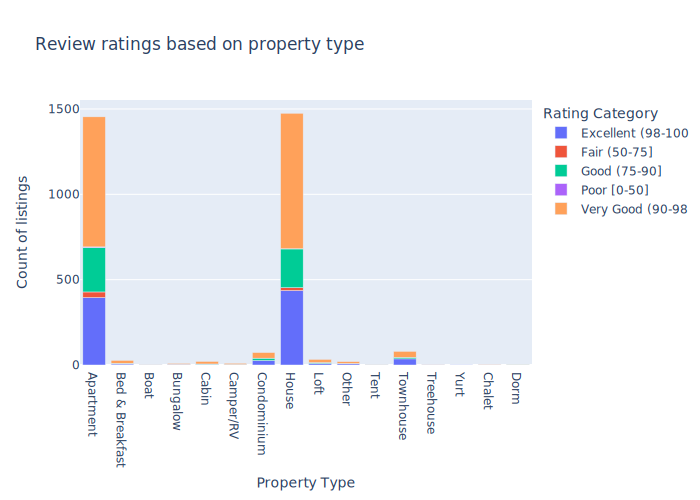

In [18]:
fig = px.bar(ans1, x = "property_type",  y="id", color="rating_category", 
             title = "Review ratings based on property type",
             labels={"property_type": "Property Type",
                     "id": "Count of listings",
                     "rating_category": "Rating Category"},)
fig.show()
fig.show('svg')

#### Insight

- The most common property type are Apartment and Houses
- Most listings were rated as Very good (90-98]
- From the entire dataset only 4 Apartments and 1 house were rated as Poor

### Question 2:  Which neighbourhoods have the highest average listings prices per night?

#### Preprocessing

In [19]:
q2=df.copy()

In [20]:
# group by neighbourhood group name and the neighbourhood name, and take the average price
ans2 = q2.groupby(["neighbourhood_group_cleansed","neighbourhood_cleansed"], as_index=False).mean()[["neighbourhood_group_cleansed","neighbourhood_cleansed","price"]]
ans2

,neighbourhood_group_cleansed,neighbourhood_cleansed,price
0,Ballard,Adams,121.671429
1,Ballard,Loyal Heights,109.384615
2,Ballard,Sunset Hill,176.055556
3,Ballard,West Woodland,124.343750
4,Ballard,Whittier Heights,128.653846
...,...,...,...
82,West Seattle,Fauntleroy,164.100000
83,West Seattle,Gatewood,124.318182
84,West Seattle,Genesee,121.970588
85,West Seattle,North Admiral,146.408163


#### Visualization

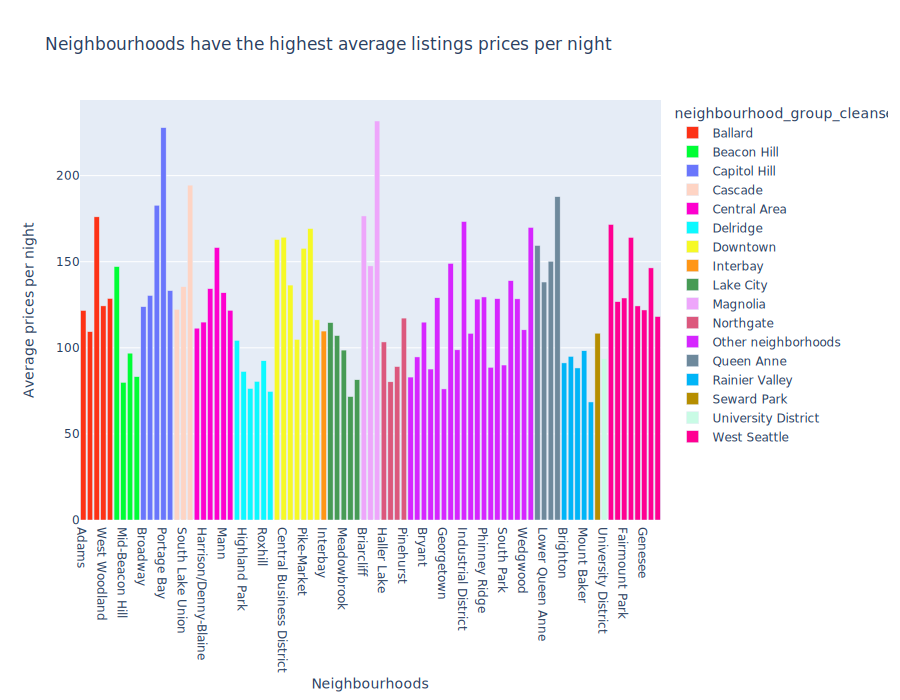

In [34]:
fig = px.bar(ans2, x = ans2["neighbourhood_cleansed"], y = ans2["price"], color= ans2["neighbourhood_group_cleansed"],
             color_discrete_sequence = px.colors.qualitative.Light24,
             title = "Neighbourhoods have the highest average listings prices per night",
             labels={"price": "Average prices per night",
                     "neighbourhood_cleansed": "Neighbourhoods"},)
fig.update_layout(
autosize=False,
width=900,
height=700,)
fig.show()
fig.show('svg')

#### Insight

- Southeast of Magnolia and Portage Bay have the highest average prices per night
- All neighbourhoods at Rainier Valley group have Average prices less than 100

### Question 3: Who are the top hosts in terms of total listings count ? What types of listings they own?

#### Preprocessing

In [22]:
q3=df.copy()

In [23]:
q3['Host'] = q3['host_id'].astype(str)

In [24]:
# top 10 hosts based on the total number of the owned listsing counts
ans3_a= q3[["Host","calculated_host_listings_count"]].drop_duplicates().nlargest(10,columns="calculated_host_listings_count" )
ans3_a

,Host,calculated_host_listings_count
315,1243056,37
687,3074414,34
97,430709,31
694,26967583,21
2642,7354306,18
2611,42537846,15
1247,1623580,12
710,2911360,11
1062,862329,11
580,754810,10


In [25]:
# Types of property owned by top 10 hosts 
ans3_b = q3.loc[q3["Host"].isin(ans3_a["Host"])].groupby(["Host","property_type"],as_index=False).count()[["Host","property_type","id"]]
ans3_b

,Host,property_type,id
0,1243056,House,37
1,1623580,Apartment,11
2,1623580,Loft,1
3,26967583,House,21
4,2911360,Apartment,8
5,2911360,Condominium,1
6,2911360,House,2
7,3074414,Apartment,30
8,3074414,Condominium,1
9,3074414,House,3


#### Visualization

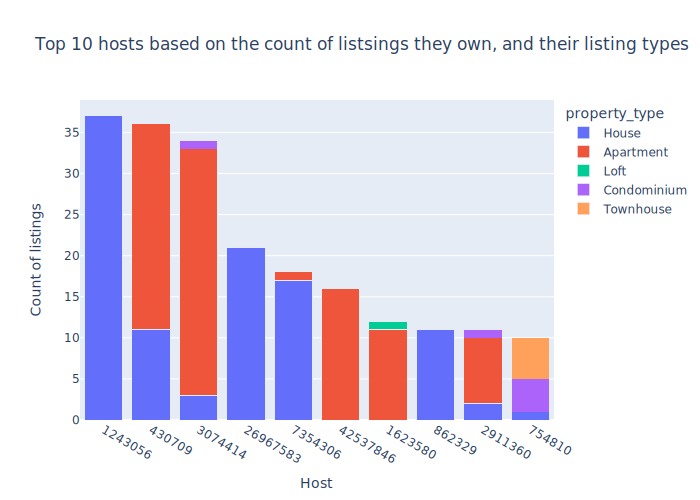

In [26]:
fig = px.bar(ans3_b, x = ans3_b["Host"], y = ans3_b["id"], color= ans3_b["property_type"],
             title = "Top 10 hosts based on the count of listsings they own, and their listing types",
             labels={"id": "Count of listings"},)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()
fig.show('svg')

#### Insight

- Top 10 Hosts own between 1 to 3 types of listings.